<a href="https://colab.research.google.com/github/kamiloborrero95/medical_data_visualizer/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto, visualizará y realizará cálculos a partir de datos de exámenes médicos utilizando matplotlib, seaborn, y pandas. Los valores del conjunto de datos (dataset) se reconocieron durante los exámenes médicos.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
# Importar los datos desde medical_examination.csvy asignarlos a la dfvariable
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [44]:
df['overweight'] = round(df['weight'] / ((df['height'] / 100) ** 2),2)
df['overweight'] = df['overweight'].apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalice los datos haciendo que 0siempre sean buenos y 1siempre malos. Si el valor de cholesterolo gluces 1, haga que el valor sea 0. Si el valor es mayor que 1, haga que el valor sea 1.

In [45]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [46]:
def draw_cat_plot():

  df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

  df_cat['total'] = 1 # Add 'total' column to df_cat instead of df
  df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count() # Group df_cat

  fig = sns.catplot(x='variable', y='total', data=df_cat, hue="value", kind='bar', col="cardio").fig

  fig.savefig('catplot.png')
  return fig

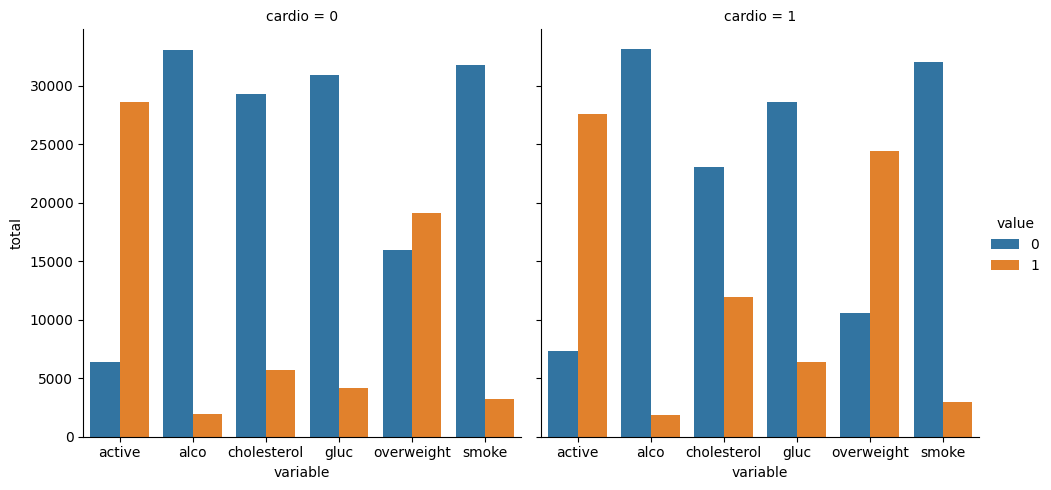

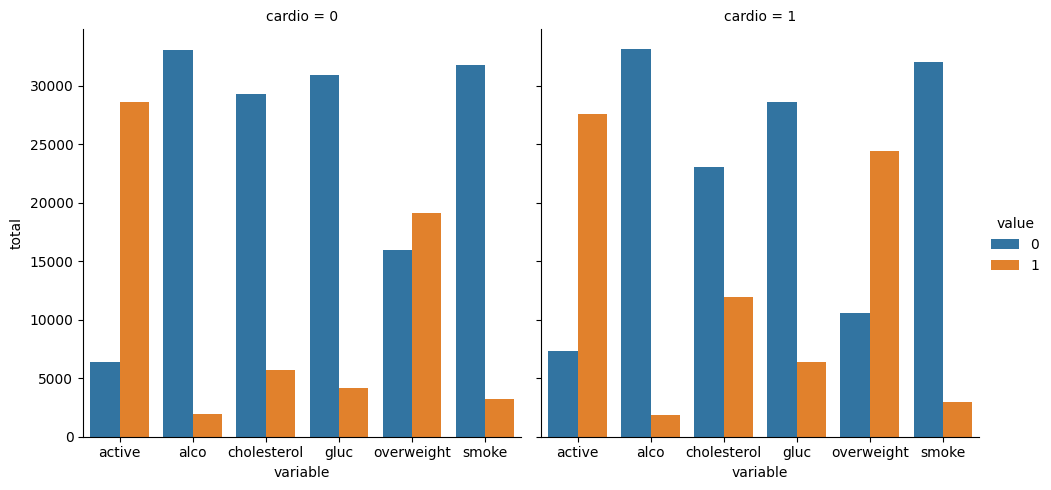

In [49]:
draw_cat_plot()

In [47]:
def draw_heat_map():

  df_heat = df[
      df['ap_lo'] <= df['ap_hi']
    & (df['height'] >= df['height'].quantile(0.025))
    & (df['height'] <= df['height'].quantile(0.975))
    & (df['weight'] >= df['weight'].quantile(0.025))
    & (df['weight'] <= df['weight'].quantile(0.975))
  ]

  corr = df_heat.corr(method="pearson")

  mask = np.triu(corr)

  fig, ax = plt.subplots(figsize=(12,12))

  sns.heatmap(corr, linewidths=1, annot=True, square=True, mask=mask, fmt='.1f', center=0.08, cbar_kws={'shrink':0.5})
  fig.savefig('heatmap.png')
  return fig

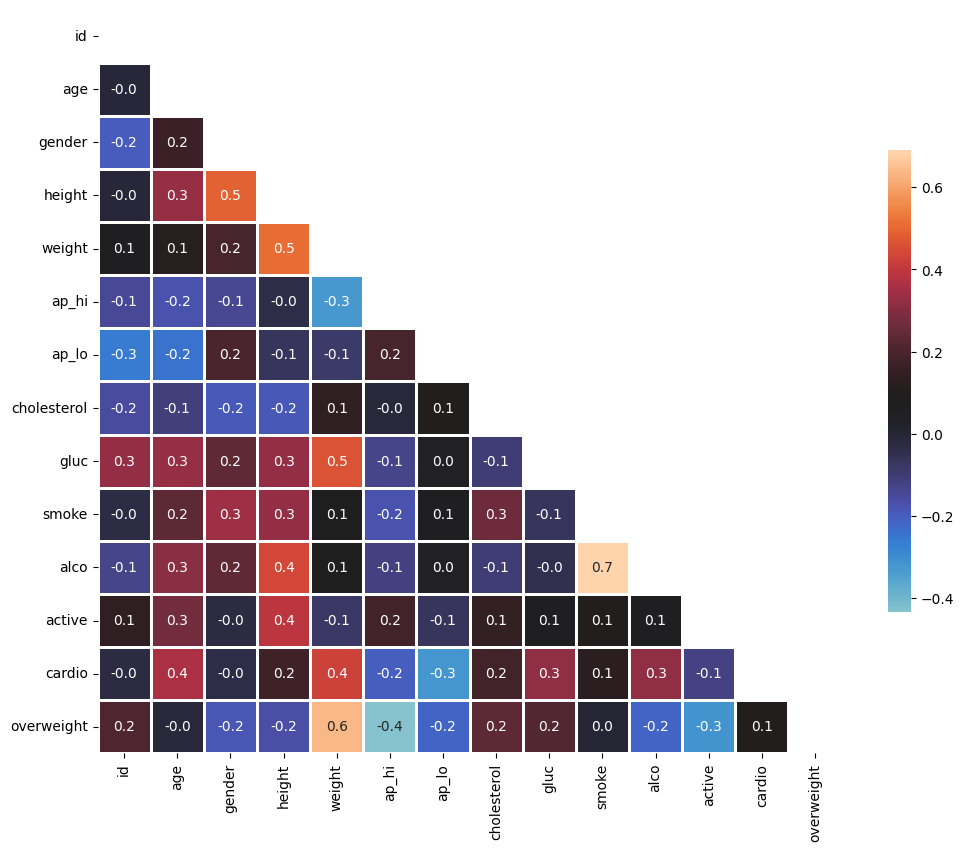

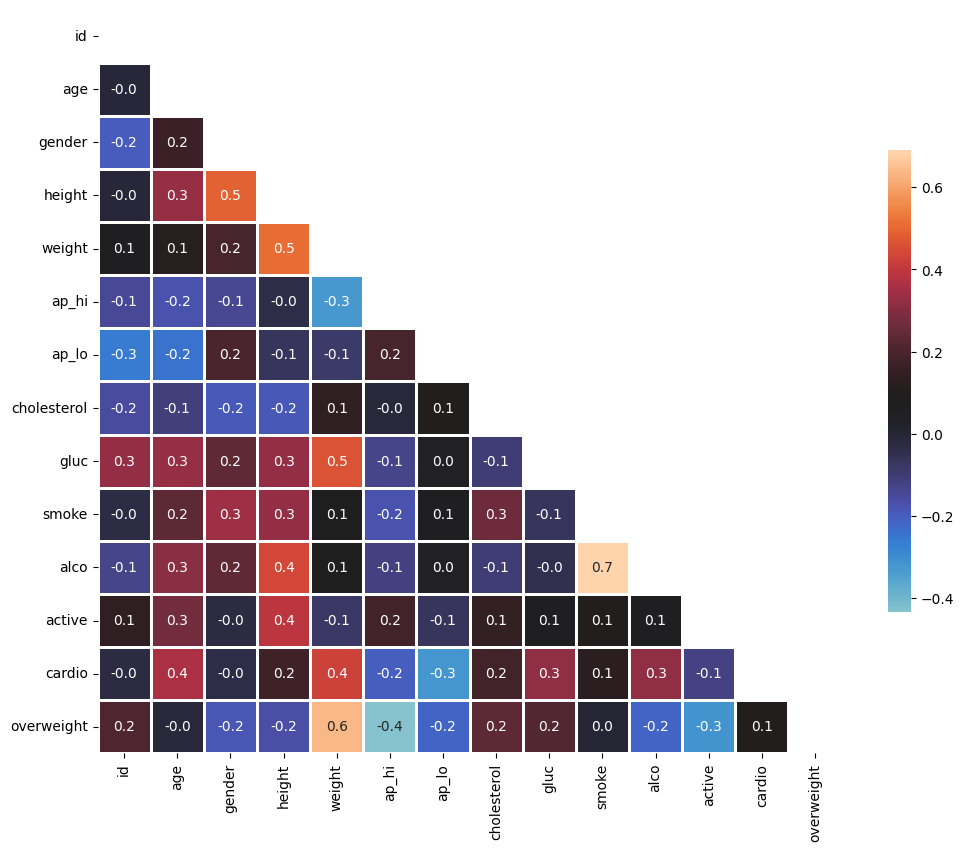

In [48]:
draw_heat_map()